In [33]:
import pandas as pd
import numpy as np
from contextlib import contextmanager
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve,plot_precision_recall_curve, average_precision_score
from sklearn import svm, manifold, decomposition, metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix, average_precision_score, accuracy_score, f1_score
from tqdm import tqdm
import lime

In [2]:
df = pd.read_csv ('./data/standardized_data.csv')
df_feat = pd.read_csv ('./data/component_std_data.csv')
df_tsne = pd.read_csv ('./data/component_tsne_data.csv')
print(df.shape)
print(df_feat.shape)
print(df_tsne.shape)

(2154, 1617)
(1613, 247)
(1613, 247)


In [3]:
df = df.drop(['age.1','dx.1','age.2','dx.2','age.3','dx.3','age.4','dx.4','age.5','dx.5',
         'age.6','dx.6','age.7','dx.7','age.8','dx.8','age.9','dx.9','age.10','dx.10',
         'age.11','dx.11','age.12','dx.12','age.13','dx.13','age.14','dx.14','age.15','dx.15',
         'age.16','dx.16','age.17','dx.17','age.18','dx.18','age.19','dx.19','age.20','dx.20',
         'age.21','dx.21','age.22','dx.22','age.23','dx.23','age.24','dx.24','age.25','dx.25',
         'age.26','dx.26','age.27','dx.27','age.28','dx.28','age.29','dx.29','age.30','dx.30',
         'age.31','dx.31','age.32','dx.32','age.33','dx.33','age.34','dx.34','age.35','dx.35',
         'age.36','dx.36','age.37','dx.37','age.38','dx.38','age.39','dx.39','age.40','dx.40',
         'age.41','dx.41','age.42','dx.42','age.43','dx.43','age.44','dx.44','age.45','dx.45',
         'age.46','dx.46','age.47','dx.47','age.48','dx.48'], axis=1)

df_feat = df_feat.drop(["age"], axis = 1)
df_tsne = df_tsne.drop(["age"], axis = 1)
print(df.shape)
print(df_feat.shape)
print(df_tsne.shape)

(2154, 1521)
(1613, 246)
(1613, 246)


In [4]:
df_impute = df.loc[(df["age"] >= 64.9) & (df["age"] <= 95.9)]
df_impute = df_impute.fillna(df_impute.mean())
diag = pd.DataFrame(df_impute["dx"])
diag.loc[(diag['dx'] == 1)] = 0
diag.loc[(diag['dx'] == 2)] = 1
meas = df_impute.loc[:, df_impute.columns != 'dx']
meas_no_age = meas.loc[:, meas.columns != 'age']

diag_feat = pd.DataFrame(df_feat["dx"])
diag_feat.loc[(diag_feat['dx'] == 1)] = 0
diag_feat.loc[(diag_feat['dx'] == 2)] = 1
meas_feat = df_feat.loc[:, df_feat.columns != 'dx']

diag_tsne = pd.DataFrame(df_tsne["dx"])
diag_tsne.loc[(diag_tsne['dx'] == 1)] = 0
diag_tsne.loc[(diag_tsne['dx'] == 2)] = 1
meas_tsne = df_tsne.loc[:, df_tsne.columns != 'dx']

x_train_og, x_test_og, y_train_og, y_test_og = sklearn.model_selection.train_test_split(meas_no_age, diag, random_state = 749, test_size=0.25,stratify= diag)
x_train_ft, x_test_ft, y_train_ft, y_test_ft = sklearn.model_selection.train_test_split(meas_feat, diag_feat, random_state = 749, test_size=0.25,stratify= diag_feat)
x_train_ts, x_test_ts, y_train_ts, y_test_ts = sklearn.model_selection.train_test_split(meas_tsne, diag_tsne, random_state = 749, test_size=0.25,stratify= diag_tsne)

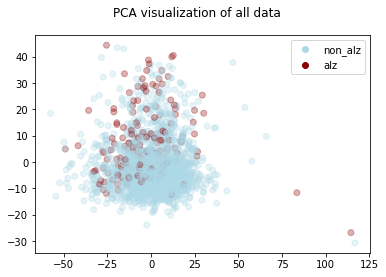

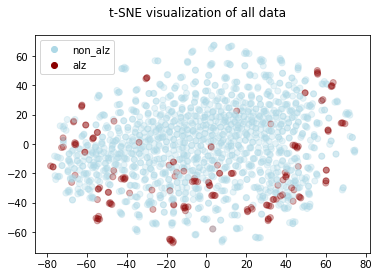

In [5]:
#print('Computing PCA Embedding')
X_full = meas_no_age
y_full = diag
outcome_str = y_full.values
pca = decomposition.PCA(n_components=2)
pca.fit(X_full)
Y = pca.transform(X_full)
colors = ['lightblue' if (i == 0) else 'darkred' for i in y_full.values]
fig = plt.figure(1)
fig.suptitle('PCA visualization of all data')
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c=colors, alpha=0.3)
m1, = plt.plot(np.nan, np.nan, c='lightblue', linestyle='None', marker='o', label='non_alz', alpha=1)
m2, = plt.plot(np.nan, np.nan, c='darkred', linestyle='None', marker='o', label="alz", alpha=1)
plt.legend(handles=[m1, m2], loc='best')
plt.show()
#plt.savefig('./pca.png', dpi=300)
#plt.close()

#print('Computing t-SNE Embedding')
tsne = manifold.TSNE(n_components=2, init='pca', random_state=726, n_iter=1500)
Y = tsne.fit_transform(X_full)

colors = ['lightblue' if (i == 0) else 'darkred' for i in y_full.values]
fig = plt.figure(2)
fig.suptitle('t-SNE visualization of all data')
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c=colors, alpha=0.3)
m1, = plt.plot(np.nan, np.nan, c='lightblue', linestyle='None', marker='o', label='non_alz', alpha=1)
m2, = plt.plot(np.nan, np.nan, c='darkred', linestyle='None', marker='o', label='alz', alpha=1)
plt.legend(handles=[m1, m2], loc='best')
plt.show()
#plt.savefig('./tsne.png', dpi=300)
#plt.close()


Baseline: ROC AUC=0.500
Logistic all data : ROC AUC=0.910
Logistic pca red. : ROC AUC=0.861
Logistic tsne red.: ROC AUC=0.826


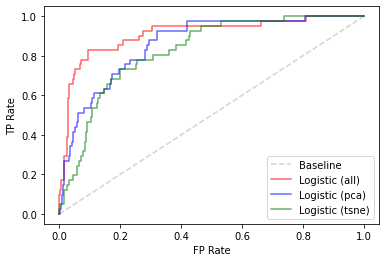

all data
[[345  18]
 [ 12  29]]
features pca
[[338  25]
 [ 20  21]]
features tsne
[[331  32]
 [ 24  17]]


In [6]:
log_reg = LogisticRegression(max_iter=100000,solver="sag", random_state = 726).fit(x_train_og, y_train_og.values.ravel())
log_reg_ft = LogisticRegression(max_iter=100000,solver="sag", random_state = 726).fit(x_train_ft, y_train_ft.values.ravel())
log_reg_ts = LogisticRegression(max_iter=100000,solver="sag", random_state = 666).fit(x_train_ts, y_train_ts.values.ravel())

# random_state=0,
ns_probs = [0 for _ in range(len(y_test_og))]
lr_probs = log_reg.predict_proba(x_test_og)
lr_probs_ft = log_reg_ft.predict_proba(x_test_ft)
lr_probs_ts = log_reg_ts.predict_proba(x_test_ts)
lr_probs = lr_probs[:, 1]
lr_probs_ft = lr_probs_ft[:, 1]
lr_probs_ts = lr_probs_ts[:, 1]
ns_auc = roc_auc_score(y_test_og, ns_probs)
lr_auc = roc_auc_score(y_test_og, lr_probs)
lr_auc_ft = roc_auc_score(y_test_ft, lr_probs_ft)
lr_auc_ts = roc_auc_score(y_test_ts, lr_probs_ts)

print('Baseline: ROC AUC=%.3f' % (ns_auc))
print('Logistic all data : ROC AUC=%.3f' % (lr_auc))
print('Logistic pca red. : ROC AUC=%.3f' % (lr_auc_ft))
print('Logistic tsne red.: ROC AUC=%.3f' % (lr_auc_ts))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_og, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_og, lr_probs)
lr_fpr_ft, lr_tpr_ft, _ = roc_curve(y_test_ft, lr_probs_ft)
lr_fpr_ts, lr_tpr_ts, _ = roc_curve(y_test_ts, lr_probs_ts)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color = "lightgrey")
plt.plot(lr_fpr, lr_tpr, marker='', label='Logistic (all)',color = "red", alpha = 0.6)
plt.plot(lr_fpr_ft, lr_tpr_ft, marker='', label='Logistic (pca)',color = "blue", alpha = 0.6)
plt.plot(lr_fpr_ts, lr_tpr_ts, marker='', label='Logistic (tsne)',color = "green", alpha = 0.6)
# axis labels
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test_og, log_reg.predict(x_test_og)).ravel()
print("all data")
print(confusion_matrix(y_test_og, log_reg.predict(x_test_og)))

tn_ft, fp_ft, fn_ft, tp_ft = confusion_matrix(y_test_ft, log_reg_ft.predict(x_test_ft)).ravel()
print("features pca")
print(confusion_matrix(y_test_ft, log_reg_ft.predict(x_test_ft)))

tn_ts, fp_ts, fn_ts, tp_ts = confusion_matrix(y_test_ts, log_reg_ts.predict(x_test_ts)).ravel()
print("features tsne")
print(confusion_matrix(y_test_ts, log_reg_ts.predict(x_test_ts)))

average percision
all data  : 0.6166
pca red.  : 0.4173
tsne red. : 0.3294


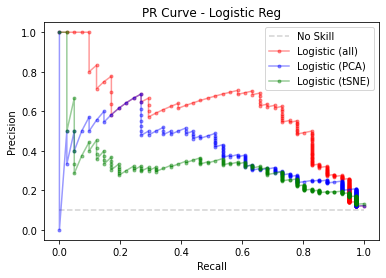

In [7]:
average_precision = average_precision_score(y_test_og, lr_probs)
average_precision_ft = average_precision_score(y_test_ft, lr_probs_ft)
average_precision_ts = average_precision_score(y_test_ts, lr_probs_ts)

no_skill = y_test_og.sum(axis =0) / len(y_test_og)

precision, recall, thresholds = precision_recall_curve(y_test_og, lr_probs)
precision_ft, recall_ft, thresholds_ft = precision_recall_curve(y_test_ft, lr_probs_ft)
precision_ts, recall_ts, thresholds_ts = precision_recall_curve(y_test_ts, lr_probs_ts)

print("average percision")
print("all data  : %.4f" % (average_precision))
print("pca red.  : %.4f" % (average_precision_ft))
print("tsne red. : %.4f" % (average_precision_ts))

plt.title('PR Curve - Logistic Reg')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color = "lightgrey")
plt.plot(recall, precision, marker='.', label='Logistic (all)',color = "red", alpha = 0.4)
plt.plot(recall_ft, precision_ft, marker='.', label='Logistic (PCA)',color = "blue", alpha = 0.4)
plt.plot(recall_ts, precision_ts, marker='.', label='Logistic (tSNE)',color = "green", alpha = 0.4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [8]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
X = x_train_og
y = y_train_og

# Support Vector Classification Model --- 
# mod_1  = svm.SVC(random_state=726, probability = True)
# mod_2  = svm.SVC(random_state=726, kernel='linear' ,probability = True)  # default
# mod_3  = svm.SVC(random_state=726, kernel='sigmoid', probability = True)
# mod_4  = svm.SVC(random_state=726, kernel='poly', probability = True)
# mod_6  = svm.SVC(random_state=726, kernel='linear', shrinking=False, probability = True)
# mod_7  = svm.SVC(random_state=726, kernel='linear', probability = True, class_weight={0:0.4,1:0.6})
# mod_8  = svm.SVC(random_state=726, kernel='linear', probability = True, class_weight={0:0.3,1:0.7})
# mod_9  = svm.SVC(random_state=726, kernel='linear', probability = True, class_weight={0:0.45,1:0.55})
# mod_10  = svm.SVC(random_state=726, kernel='linear', probability = True,tol=1e-4)
# mod_11  = svm.SVC(random_state=726, kernel='linear', probability = True,tol=1e-6)
# mod_12  = svm.SVC(random_state=726, kernel='linear', probability = True,tol=1e-8)
# mod_13  = svm.SVC(random_state=726, kernel='linear', probability = True,tol=1e-10)
# mod_14  = svm.SVC(random_state=726, kernel='linear', probability = True,tol=1e-8, gamma='auto')
mod_scv  = svm.SVC(random_state=726, kernel='linear' ,probability = True,break_ties=True)
mod_scv_ft  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55}, tol=1e-4, break_ties=True)
mod_scv_ts  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6}, tol=1e-6, break_ties=True)
# mod_16  = svm.SVC(random_state=726, kernel='linear',shrinking=False, probability = True,class_weight={0:0.45,1:0.55},tol=1e-8,break_ties=True)

# Random Forest Classification Model ---
# mod_1 = RandomForestClassifier(random_state=726) # default
# mod_2 = RandomForestClassifier(random_state=726, criterion="entropy") 
# mod_3 = RandomForestClassifier(random_state=726, max_features=None) 
# mod_4 = RandomForestClassifier(random_state=726, max_features="log2") 
# mod_5 = RandomForestClassifier(random_state=726, max_features="sqrt") 
# mod_6 = RandomForestClassifier(random_state=726, max_features=0.2) 
# mod_7 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.015) 
# mod_8 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.005) 
# mod_9 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.01) 
# mod_10 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005) 
# mod_11 = RandomForestClassifier(random_state=726, max_features="sqrt", ccp_alpha=0.00005, n_estimators=50) 
# mod_12 = RandomForestClassifier(random_state=726, max_features="sqrt", ccp_alpha=0.00005, n_estimators=20) 
# mod_13 = RandomForestClassifier(random_state=726, max_features="sqrt", ccp_alpha=0.00005, n_estimators=45) 
# mod_14 = RandomForestClassifier(random_state=726, max_features="sqrt", ccp_alpha=0.00005, n_estimators=75) 
# mod_15 = RandomForestClassifier(random_state=726, max_features="sqrt", ccp_alpha=0.00005, n_estimators=60)
mod_rfc = RandomForestClassifier(random_state=726, max_features=0.2) 
mod_rfc_ft = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=150)
mod_rfc_ts = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.000005, n_estimators=150)
# mod_17 = RandomForestClassifier(random_state=726, max_features="sqrt", ccp_alpha=0.00005, n_estimators=80)

# Multi-Layer Perceptron Classification Model ---
# mod_1 = MLPClassifier(random_state=726)  # default
# mod_2 = MLPClassifier(random_state=726, solver='lbfgs')
# mod_3 = MLPClassifier(random_state=726, solver='sgd')
# mod_4 = MLPClassifier(random_state=726, activation = "identity")
# mod_5 = MLPClassifier(random_state=726, activation = "logistic")
# mod_6 = MLPClassifier(random_state=726, activation = "tanh")
# mod_7 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.001)
# mod_8 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0015)
# mod_9 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005)
# mod_10 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0003)
# mod_11 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002)
# mod_12 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, solver = "lbfgs")
# mod_13 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, solver = "sgd")
# mod_14 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(50,))
# mod_15 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(150,))
# mod_16 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(100,))
# mod_17 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(50,50))
# mod_18 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(150,50))
# mod_19 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(100,50))
# mod_20 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(50,50,25))
# mod_21 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(150,50,25))
# mod_22 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(100,50,25))
# mod_23 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "invscaling")
mod_mlp = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(150,), learning_rate = "adaptive")
mod_mlp_ft = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(100,), learning_rate = "invscaling")
mod_mlp_ts = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(100,), learning_rate = "adaptive")
# mod_25 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "adaptive",max_iter=700)
# mod_26 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "adaptive",max_iter=500)
# mod_27 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "adaptive",max_iter=300)

validation_acc_array_scv, validation_acc_array_rfc, validation_acc_array_mlp = [],[],[]

for train_ix, validation_ix in tqdm(kf.split(X,y),total=5):
    X_train, X_validation = X.iloc[train_ix], X.iloc[validation_ix]
    y_train, y_validation = y.iloc[train_ix], y.iloc[validation_ix]

    mod_scv.fit(X_train, y_train.to_numpy().ravel())
    pred_train_scv = mod_scv.predict(X_train)
    pred_validation_scv = mod_scv.predict(X_validation)
    train_acc_scv = accuracy_score(y_train, pred_train_scv)
    validation_acc_scv = accuracy_score(y_validation, pred_validation_scv)

    mod_rfc.fit(X_train, y_train.to_numpy().ravel())
    pred_train_rfc = mod_rfc.predict(X_train)
    pred_validation_rfc = mod_rfc.predict(X_validation)
    train_acc_rfc = accuracy_score(y_train, pred_train_rfc)
    validation_acc_rfc = accuracy_score(y_validation, pred_validation_rfc)
    
    mod_mlp.fit(X_train, y_train.to_numpy().ravel())
    pred_train_mlp = mod_mlp.predict(X_train)
    pred_validation_mlp = mod_mlp.predict(X_validation)
    train_acc_mlp = accuracy_score(y_train, pred_train_mlp)
    validation_acc_mlp = accuracy_score(y_validation, pred_validation_mlp)

#     lr_probs_scv = mod_mlp.predict_proba(X_validation)
#     lr_probs_scv = lr_probs_scv[:, 1]

#     average_precision = average_precision_score(y_validation, lr_probs_scv)
#     avg_perc.append(average_precision)
    
#     print(confusion_matrix(y_validation, mod_mlp.predict(X_validation)))
    # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g')
    # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g',normalize='true')
    # plot_confusion_matrix(clf, X_validation, y_validation,cmap='GnBu',values_format='.4g')
     
    validation_acc_array_scv.append(validation_acc_scv)
    validation_acc_array_rfc.append(validation_acc_rfc)
    validation_acc_array_mlp.append(validation_acc_mlp)
# print(np.mean(validation_acc_array))
# print(validation_acc_array)
# print(np.mean(avg_perc))

mod_scv.fit(x_train_og, y_train_og.to_numpy().ravel())
mod_rfc.fit(x_train_og, y_train_og.to_numpy().ravel())
mod_mlp.fit(x_train_og, y_train_og.to_numpy().ravel())

100%|██████████| 5/5 [03:25<00:00, 41.06s/it]


MLPClassifier(activation='tanh', alpha=0.0005, hidden_layer_sizes=(150,),
              learning_rate='adaptive', random_state=726)

In [9]:
X_ft = x_train_ft
y_ft = y_train_ft

# Support Vector Classification Model --- 
# mod_1  = svm.SVC(random_state=726, kernel='linear',probability = True)
# mod_2  = svm.SVC(random_state=726, probability = True)  # default
# mod_3  = svm.SVC(random_state=726, kernel='sigmoid', probability = True)
# mod_4  = svm.SVC(random_state=726, kernel='poly', probability = True)
# mod_6  = svm.SVC(random_state=726, kernel='linear', shrinking=False, probability = True)
# mod_7  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6})
# mod_8  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.3,1:0.7})
# mod_9  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55})
# mod_10  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55}, tol=1e-4)
# mod_11  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55}, tol=1e-6)
# mod_12  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55}, tol=1e-8)
# mod_13  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55}, tol=1e-10)
mod_scv_ft  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55}, tol=1e-4, break_ties=True)
# mod_16  = svm.SVC(random_state=726, kernel='linear',shrinking=False, probability = True,class_weight={0:0.45,1:0.55},tol=1e-8,break_ties=True)

# Random Forest Classification Model ---
# mod_1 = RandomForestClassifier(random_state=726) # default
# mod_2 = RandomForestClassifier(random_state=726, criterion="entropy") 
# mod_3 = RandomForestClassifier(random_state=726, max_features=None) 
# mod_4 = RandomForestClassifier(random_state=726, max_features="log2") 
# mod_5 = RandomForestClassifier(random_state=726, max_features="sqrt") 
# mod_6 = RandomForestClassifier(random_state=726, max_features=0.2) 
# mod_7 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.015) 
# mod_8 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.005) 
# mod_9 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.01) 
# mod_10 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005) 
# mod_11 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=50) 
# mod_12 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=20) 
# mod_13 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=45) 
# mod_14 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=75) 
# mod_15 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=150)
mod_rfc_ft = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=150)


# Multi-Layer Perceptron Classification Model ---
# mod_1 = MLPClassifier(random_state=726,max_iter=700)  # default
# mod_2 = MLPClassifier(random_state=726, solver='lbfgs')
# mod_3 = MLPClassifier(random_state=726, solver='sgd')
# mod_4 = MLPClassifier(random_state=726, activation = "identity",max_iter=700)
# mod_5 = MLPClassifier(random_state=726, activation = "logistic",max_iter=700)
# mod_6 = MLPClassifier(random_state=726, activation = "tanh",max_iter=700)
# mod_7 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001)
# mod_8 = MLPClassifier(random_state=726, max_iter=700, alpha=0.0015)
# mod_9 = MLPClassifier(random_state=726, max_iter=700, alpha=0.0005)
# mod_10 = MLPClassifier(random_state=726, max_iter=700, alpha=0.0003)
# mod_11 = MLPClassifier(random_state=726, max_iter=700, alpha=0.0002)
# mod_12 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, solver = "lbfgs")
# mod_13 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, solver = "sgd")
# mod_14 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(50,))
# mod_15 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(150,))
# mod_16 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(100,))
# mod_17 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(50,50))
# mod_18 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(150,50))
# mod_19 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(100,50))
# mod_20 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(50,50,25))
# mod_21 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(150,50,25))
# mod_22 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(100,50,25))
# mod_23 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(100,), learning_rate = "invscaling")
mod_mlp_ft = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(100,), learning_rate = "invscaling")
# mod_25 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "adaptive",max_iter=700)
# mod_26 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "adaptive",max_iter=500)
# mod_27 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "adaptive",max_iter=300)

validation_acc_array_scv_ft, validation_acc_array_rfc_ft, validation_acc_array_mlp_ft = [],[],[]

for train_ix, validation_ix in tqdm(kf.split(X_ft,y_ft),total=5):
    X_train, X_validation = X_ft.iloc[train_ix], X_ft.iloc[validation_ix]
    y_train, y_validation = y_ft.iloc[train_ix], y_ft.iloc[validation_ix]

    mod_scv_ft.fit(X_train, y_train.to_numpy().ravel())
    pred_train_scv = mod_scv_ft.predict(X_train)
    pred_validation_scv = mod_scv_ft.predict(X_validation)
    train_acc_scv = accuracy_score(y_train, pred_train_scv)
    validation_acc_scv = accuracy_score(y_validation, pred_validation_scv)
    
    mod_rfc_ft.fit(X_train, y_train.to_numpy().ravel())
    pred_train_rfc = mod_rfc_ft.predict(X_train)
    pred_validation_rfc = mod_rfc_ft.predict(X_validation)
    train_acc_rfc = accuracy_score(y_train, pred_train_rfc)
    validation_acc_rfc = accuracy_score(y_validation, pred_validation_rfc)
    
    mod_mlp_ft.fit(X_train, y_train.to_numpy().ravel())
    pred_train_mlp = mod_mlp_ft.predict(X_train)
    pred_validation_mlp = mod_mlp_ft.predict(X_validation)
    train_acc_mlp = accuracy_score(y_train, pred_train_mlp)
    validation_acc_mlp = accuracy_score(y_validation, pred_validation_mlp)
    
    # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g')
    # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g',normalize='true')
    # plot_confusion_matrix(clf, X_validation, y_validation,cmap='GnBu',values_format='.4g')
     
    validation_acc_array_scv_ft.append(validation_acc_scv)
    validation_acc_array_rfc_ft.append(validation_acc_rfc)
    validation_acc_array_mlp_ft.append(validation_acc_mlp)
    
mod_scv_ft.fit(x_train_ft, y_train_ft.to_numpy().ravel())
mod_rfc_ft.fit(x_train_ft, y_train_ft.to_numpy().ravel())
mod_mlp_ft.fit(x_train_ft, y_train_ft.to_numpy().ravel())

100%|██████████| 5/5 [00:56<00:00, 11.35s/it]


MLPClassifier(alpha=0.001, learning_rate='invscaling', max_iter=700,
              random_state=726)

In [10]:
X_ts = x_train_ts
y_ts = y_train_ts

# Support Vector Classification Model --- 
# mod_1  = svm.SVC(random_state=726, kernel='linear',probability = True)
# mod_2  = svm.SVC(random_state=726, probability = True)  # default
# mod_3  = svm.SVC(random_state=726, kernel='sigmoid', probability = True)
# mod_4  = svm.SVC(random_state=726, kernel='poly', probability = True)
# mod_6  = svm.SVC(random_state=726, kernel='linear', shrinking=False, probability = True)
# mod_7  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6})
# mod_8  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.3,1:0.7})
# mod_9  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55})
# mod_10  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6}, tol=1e-4)
# mod_11  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6}, tol=1e-6)
# mod_12  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6}, tol=1e-8)
# mod_13  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6}, tol=1e-10)
mod_scv_ts  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6}, tol=1e-6, break_ties=True)
# mod_16  = svm.SVC(random_state=726, kernel='linear',shrinking=False, probability = True,class_weight={0:0.45,1:0.55},tol=1e-8,break_ties=True)

# Random Forest Classification Model ---
# mod_1 = RandomForestClassifier(random_state=726) # default
# mod_2 = RandomForestClassifier(random_state=726, criterion="entropy") 
# mod_3 = RandomForestClassifier(random_state=726, max_features=None) 
# mod_4 = RandomForestClassifier(random_state=726, max_features="log2") 
# mod_5 = RandomForestClassifier(random_state=726, max_features="sqrt") 
# mod_6 = RandomForestClassifier(random_state=726, max_features=0.2) 
# mod_7 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.015) 
# mod_8 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.005) 
# mod_9 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.01) 
# mod_10 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005) 
# mod_11 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=50) 
# mod_12 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=20) 
# mod_13 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=45) 
# mod_14 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=75) 
# mod_15 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=150)
mod_rfc_ts = RandomForestClassifier(random_state=729, max_features=0.2, ccp_alpha=0.000005, n_estimators=150)


# Multi-Layer Perceptron Classification Model ---
# mod_1 = MLPClassifier(random_state=726,max_iter=700)  # default
# mod_2 = MLPClassifier(random_state=726, solver='lbfgs',max_iter=700)
# mod_3 = MLPClassifier(random_state=726, solver='sgd',max_iter=700)
# mod_4 = MLPClassifier(random_state=726, solver='sgd', activation = "identity",max_iter=700)
# mod_5 = MLPClassifier(random_state=726, solver='sgd', activation = "logistic",max_iter=700)
# mod_6 = MLPClassifier(random_state=726, solver='sgd', activation = "tanh",max_iter=700)
# mod_7 = MLPClassifier(random_state=726, solver='sgd', max_iter=700,  alpha=0.001)
# mod_8 = MLPClassifier(random_state=726, solver='sgd', max_iter=700, alpha=0.0015)
# mod_9 = MLPClassifier(random_state=726, solver='sgd', max_iter=700, alpha=0.0005)
# mod_10 = MLPClassifier(random_state=726, solver='sgd', max_iter=700, alpha=0.0003)
# mod_11 = MLPClassifier(random_state=726, solver='lbfgs', max_iter=700, alpha=0.0002)
# mod_12 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.0002, solver = "lbfgs")
# mod_13 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.0002, solver = "sgd")
# mod_14 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(50,))
# mod_15 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(150,))
# mod_16 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(100,))
# mod_17 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(50,50))
# mod_18 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(150,50))
# mod_19 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(100,50))
# mod_20 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(50,50,25))
# mod_21 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(150,50,25))
# mod_22 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(100,50,25))
# mod_23 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(100,), learning_rate = "adaptive")
mod_mlp_ts = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(100,), learning_rate = "adaptive")

validation_acc_array_scv_ts, validation_acc_array_rfc_ts, validation_acc_array_mlp_ts = [],[],[]

for train_ix, validation_ix in tqdm(kf.split(X_ts,y_ts),total=5):
    X_train, X_validation = X_ts.iloc[train_ix], X_ts.iloc[validation_ix]
    y_train, y_validation = y_ts.iloc[train_ix], y_ts.iloc[validation_ix]

    mod_scv_ts.fit(X_train, y_train.to_numpy().ravel())
    pred_train_scv = mod_scv_ts.predict(X_train)
    pred_validation_scv = mod_scv_ts.predict(X_validation)
    train_acc_scv = accuracy_score(y_train, pred_train_scv)
    validation_acc_scv = accuracy_score(y_validation, pred_validation_scv)

    mod_rfc_ts.fit(X_train, y_train.to_numpy().ravel())
    pred_train_rfc = mod_rfc_ts.predict(X_train)
    pred_validation_rfc = mod_rfc_ts.predict(X_validation)
    train_acc_rfc = accuracy_score(y_train, pred_train_rfc)
    validation_acc_rfc = accuracy_score(y_validation, pred_validation_rfc)
    
    mod_mlp_ts.fit(X_train, y_train.to_numpy().ravel())
    pred_train_mlp = mod_mlp_ts.predict(X_train)
    pred_validation_mlp = mod_mlp_ts.predict(X_validation)
    train_acc_mlp = accuracy_score(y_train, pred_train_mlp)
    validation_acc_mlp = accuracy_score(y_validation, pred_validation_mlp)

#     lr_probs_scv = mod_mlp_ts.predict_proba(X_validation)
#     lr_probs_scv = lr_probs_scv[:, 1]

#     average_precision = average_precision_score(y_validation, lr_probs_scv)
#     avg_perc.append(average_precision)
    
#     print(confusion_matrix(y_validation, mod_mlp_ts.predict(X_validation)))
    
    # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g')
    # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g',normalize='true')
    # plot_confusion_matrix(clf, X_validation, y_validation,cmap='GnBu',values_format='.4g')
     
    validation_acc_array_scv_ts.append(validation_acc_scv)
    validation_acc_array_rfc_ts.append(validation_acc_rfc)
    validation_acc_array_mlp_ts.append(validation_acc_mlp)
# print(np.mean(validation_acc_array))
# print(validation_acc_array)

mod_scv_ts.fit(x_train_ts, y_train_ts.to_numpy().ravel())
mod_rfc_ts.fit(x_train_ts, y_train_ts.to_numpy().ravel())
mod_mlp_ts.fit(x_train_ts, y_train_ts.to_numpy().ravel())

100%|██████████| 5/5 [00:48<00:00,  9.67s/it]


MLPClassifier(alpha=0.0002, learning_rate='adaptive', max_iter=700,
              random_state=726, solver='sgd')

In [11]:
print("all data")
print(np.mean(validation_acc_array_scv))
print(np.mean(validation_acc_array_rfc))
print(np.mean(validation_acc_array_mlp))
print("\nfeature pca")
print(np.mean(validation_acc_array_scv_ft))
print(np.mean(validation_acc_array_rfc_ft))
print(np.mean(validation_acc_array_mlp_ft))
print("\nfeature tsne")
print(np.mean(validation_acc_array_scv_ts))
print(np.mean(validation_acc_array_rfc_ts))
print(np.mean(validation_acc_array_mlp_ts))

# print("all data")
# plot_confusion_matrix(log_reg, x_test_og, y_test_og,cmap='GnBu',values_format='.4g')
# plot_confusion_matrix(mod_scv, x_test_og, y_test_og,cmap='GnBu',values_format='.4g')
# plot_confusion_matrix(mod_rfc, x_test_og, y_test_og,cmap='GnBu',values_format='.4g')
# plot_confusion_matrix(mod_mlp, x_test_og, y_test_og,cmap='GnBu',values_format='.4g')
# print("\nfeature pca")
# plot_confusion_matrix(log_reg_ft, x_test_ft, y_test_ft,cmap='GnBu',values_format='.4g')
# plot_confusion_matrix(mod_scv_ft, x_test_ft, y_test_ft,cmap='GnBu',values_format='.4g')
# plot_confusion_matrix(mod_rfc_ft, x_test_ft, y_test_ft,cmap='GnBu',values_format='.4g')
# plot_confusion_matrix(mod_mlp_ft, x_test_ft, y_test_ft,cmap='GnBu',values_format='.4g')
print("\n\nall data")
print(confusion_matrix(y_test_og, log_reg.predict(x_test_og)))
print(confusion_matrix(y_test_og, mod_scv.predict(x_test_og)))
print(confusion_matrix(y_test_og, mod_rfc.predict(x_test_og)))
print(confusion_matrix(y_test_og, mod_mlp.predict(x_test_og)))
print("\nfeature pca")
print(confusion_matrix(y_test_ft, log_reg_ft.predict(x_test_ft)))
print(confusion_matrix(y_test_ft, mod_scv_ft.predict(x_test_ft)))
print(confusion_matrix(y_test_ft, mod_rfc_ft.predict(x_test_ft)))
print(confusion_matrix(y_test_ft, mod_mlp_ft.predict(x_test_ft)))
print("\nfeature tsne")
print(confusion_matrix(y_test_ts, log_reg_ts.predict(x_test_ts)))
print(confusion_matrix(y_test_ts, mod_scv_ts.predict(x_test_ts)))
print(confusion_matrix(y_test_ts, mod_rfc_ts.predict(x_test_ts)))
print(confusion_matrix(y_test_ts, mod_mlp_ts.predict(x_test_ts)))

all data
0.884208360481465
0.8974280717396523
0.7684201502006104

feature pca
0.844504646617057
0.8999211275333494
0.9065258393059222

feature tsne
0.828809025753575
0.8999211275333494
0.8560954699770242


all data
[[345  18]
 [ 12  29]]
[[346  17]
 [ 16  25]]
[[362   1]
 [ 39   2]]
[[314  49]
 [  6  35]]

feature pca
[[338  25]
 [ 20  21]]
[[323  40]
 [ 15  26]]
[[361   2]
 [ 38   3]]
[[349  14]
 [ 24  17]]

feature tsne
[[331  32]
 [ 24  17]]
[[311  52]
 [ 23  18]]
[[362   1]
 [ 40   1]]
[[342  21]
 [ 23  18]]


In [43]:
ns_probs = [0 for _ in range(len(y_test_og))]
lr_probs_lgrg = log_reg.predict_proba(x_test_og)
lr_probs_lgrg = lr_probs_lgrg[:, 1]
lr_probs_scv = mod_scv.predict_proba(x_test_og)
lr_probs_scv = lr_probs_scv[:, 1]
lr_probs_rfc = mod_rfc.predict_proba(x_test_og)
lr_probs_rfc = lr_probs_rfc[:, 1]
lr_probs_mlp = mod_mlp.predict_proba(x_test_og)
lr_probs_mlp = lr_probs_mlp[:, 1]

lr_probs_lgrg_ft = log_reg_ft.predict_proba(x_test_ft)
lr_probs_lgrg_ft = lr_probs_lgrg_ft[:, 1]
lr_probs_scv_ft = mod_scv_ft.predict_proba(x_test_ft)
lr_probs_scv_ft = lr_probs_scv_ft[:, 1]
lr_probs_rfc_ft = mod_rfc_ft.predict_proba(x_test_ft)
lr_probs_rfc_ft = lr_probs_rfc_ft[:, 1]
lr_probs_mlp_ft = mod_mlp_ft.predict_proba(x_test_ft)
lr_probs_mlp_ft = lr_probs_mlp_ft[:, 1]

lr_probs_lgrg_ts = log_reg_ts.predict_proba(x_test_ts)
lr_probs_lgrg_ts = lr_probs_lgrg_ts[:, 1]
lr_probs_scv_ts = mod_scv_ts.predict_proba(x_test_ts)
lr_probs_scv_ts = lr_probs_scv_ts[:, 1]
lr_probs_rfc_ts = mod_rfc_ts.predict_proba(x_test_ts)
lr_probs_rfc_ts = lr_probs_rfc_ts[:, 1]
lr_probs_mlp_ts = mod_mlp_ts.predict_proba(x_test_ts)
lr_probs_mlp_ts = lr_probs_mlp_ts[:, 1]

print("all data")
pred_test_lgrg = log_reg.predict(x_test_og)
test_acc_lgrg = accuracy_score(y_test_og, pred_test_lgrg)
test_f1_lgrg = f1_score(y_test_og, pred_test_lgrg)
print('Test Accuracy LogReg = %.3f' % (test_acc_lgrg))
pred_test_scv = mod_scv.predict(x_test_og)
test_acc_scv = accuracy_score(y_test_og, pred_test_scv)
test_f1_scv = f1_score(y_test_og, pred_test_scv)
print('Test Accuracy SCV    = %.3f' % (test_acc_scv))
pred_test_rfc = mod_rfc.predict(x_test_og)
test_acc_rfc = accuracy_score(y_test_og, pred_test_rfc)
test_f1_rfc = f1_score(y_test_og, pred_test_rfc)
print('Test Accuracy RFC    = %.3f' % (test_acc_rfc))
pred_test_mlp = mod_mlp.predict(x_test_og)
test_acc_mlp = accuracy_score(y_test_og, pred_test_mlp)
test_f1_mlp = f1_score(y_test_og, pred_test_mlp)
print('Test Accuracy MLP    = %.3f' % (test_acc_mlp))

print('\nTest F1 LogReg = %.3f' % (test_f1_lgrg))
print('Test F1 SCV    = %.3f' % (test_f1_scv))
print('Test F1 RFC    = %.3f' % (test_f1_rfc))
print('Test F1 MLP    = %.3f' % (test_f1_mlp))


print("\nfeature pca")
pred_test_lgrg_ft = log_reg_ft.predict(x_test_ft)
test_acc_lgrg_ft = accuracy_score(y_test_ft, pred_test_lgrg_ft)
test_f1_lgrg_ft = f1_score(y_test_ft, pred_test_lgrg_ft)
print('Test Accuracy LogReg = %.3f' % (test_acc_lgrg_ft))
pred_test_scv_ft = mod_scv_ft.predict(x_test_ft)
test_acc_scv_ft = accuracy_score(y_test_ft, pred_test_scv_ft)
test_f1_scv_ft = f1_score(y_test_ft, pred_test_scv_ft)
print('Test Accuracy SCV    = %.3f' % (test_acc_scv_ft))
pred_test_rfc_ft = mod_rfc_ft.predict(x_test_ft)
test_acc_rfc_ft = accuracy_score(y_test_ft, pred_test_rfc_ft)
test_f1_rfc_ft = f1_score(y_test_ft, pred_test_rfc_ft)
print('Test Accuracy RFC    = %.3f' % (test_acc_rfc_ft))
pred_test_mlp_ft = mod_mlp_ft.predict(x_test_ft)
test_acc_mlp_ft = accuracy_score(y_test_ft, pred_test_mlp_ft)
test_f1_mlp_ft = f1_score(y_test_ft, pred_test_mlp_ft)
print('Test Accuracy MLP    = %.3f' % (test_acc_mlp_ft))

print('\nTest F1 LogReg = %.3f' % (test_f1_lgrg_ft))
print('Test F1 SCV    = %.3f' % (test_f1_scv_ft))
print('Test F1 RFC    = %.3f' % (test_f1_rfc_ft))
print('Test F1 MLP    = %.3f' % (test_f1_mlp_ft))


print("\nfeature tsne")
pred_test_lgrg_ts = log_reg_ts.predict(x_test_ts)
test_acc_lgrg_ts = accuracy_score(y_test_ts, pred_test_lgrg_ts)
test_f1_lgrg_ts = f1_score(y_test_ts, pred_test_lgrg_ts)
print('Test Accuracy LogReg = %.3f' % (test_acc_lgrg_ts))
pred_test_scv_ts = mod_scv_ts.predict(x_test_ts)
test_acc_scv_ts = accuracy_score(y_test_ts, pred_test_scv_ts)
test_f1_scv_ts = f1_score(y_test_ts, pred_test_scv_ts)
print('Test Accuracy SCV    = %.3f' % (test_acc_scv_ts))
pred_test_rfc_ts = mod_rfc_ts.predict(x_test_ts)
test_acc_rfc_ts = accuracy_score(y_test_ft, pred_test_rfc_ts)
test_f1_rfc_ts = f1_score(y_test_ts, pred_test_rfc_ts)
print('Test Accuracy RFC    = %.3f' % (test_acc_rfc_ts))
pred_test_mlp_ts = mod_mlp_ts.predict(x_test_ts)
test_acc_mlp_ts = accuracy_score(y_test_ts, pred_test_mlp_ts)
test_f1_mlp_ts = f1_score(y_test_ts, pred_test_mlp_ts)
print('Test Accuracy MLP    = %.3f' % (test_acc_mlp_ts))

print('\nTest F1 LogReg = %.3f' % (test_f1_lgrg_ts))
print('Test F1 SCV    = %.3f' % (test_f1_scv_ts))
print('Test F1 RFC    = %.3f' % (test_f1_rfc_ts))
print('Test F1 MLP    = %.3f' % (test_f1_mlp_ts))


all data
Test Accuracy LogReg = 0.926
Test Accuracy SCV    = 0.918
Test Accuracy RFC    = 0.901
Test Accuracy MLP    = 0.864

Test F1 LogReg = 0.659
Test F1 SCV    = 0.602
Test F1 RFC    = 0.091
Test F1 MLP    = 0.560

feature pca
Test Accuracy LogReg = 0.889
Test Accuracy SCV    = 0.864
Test Accuracy RFC    = 0.901
Test Accuracy MLP    = 0.906

Test F1 LogReg = 0.483
Test F1 SCV    = 0.486
Test F1 RFC    = 0.130
Test F1 MLP    = 0.472

feature tsne
Test Accuracy LogReg = 0.861
Test Accuracy SCV    = 0.814
Test Accuracy RFC    = 0.899
Test Accuracy MLP    = 0.891

Test F1 LogReg = 0.378
Test F1 SCV    = 0.324
Test F1 RFC    = 0.047
Test F1 MLP    = 0.450


average percision - all data
Log Reg  : 0.6166
SCV      : 0.6320
RFC      : 0.5682
MLP      : 0.4275


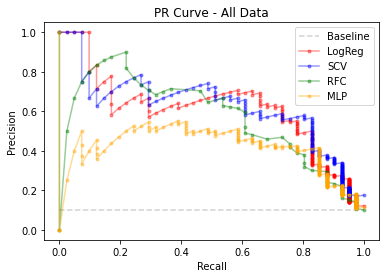

In [13]:
average_precision_all_lgrg = average_precision_score(y_test_og, lr_probs_lgrg)
average_precision_all_scv = average_precision_score(y_test_og, lr_probs_scv)
average_precision_all_rfc = average_precision_score(y_test_og, lr_probs_rfc)
average_precision_all_mlp = average_precision_score(y_test_og, lr_probs_mlp)

no_skill = y_test_og.sum(axis =0) / len(y_test_og)

precision_all_lgrg, recall_all_lgrg, thresholds_all_lgrg = precision_recall_curve(y_test_og, lr_probs_lgrg)
precision_all_scv, recall_all_scv, thresholds_all_scv = precision_recall_curve(y_test_og, lr_probs_scv)
precision_all_rfc, recall_all_rfc, thresholds_all_rfc = precision_recall_curve(y_test_og, lr_probs_rfc)
precision_all_mlp, recall_all_mlp, thresholds_all_mlp = precision_recall_curve(y_test_og, lr_probs_mlp)

print("average percision - all data")
print("Log Reg  : %.4f" % (average_precision_all_lgrg))
print("SCV      : %.4f" % (average_precision_all_scv))
print("RFC      : %.4f" % (average_precision_all_rfc))
print("MLP      : %.4f" % (average_precision_all_mlp))

plt.title('PR Curve - All Data')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline', color = "lightgrey")
plt.plot(recall_all_lgrg, precision_all_lgrg, marker='.', label='LogReg',color = "red", alpha = 0.4)
plt.plot(recall_all_scv, precision_all_scv, marker='.', label='SCV',color = "blue", alpha = 0.4)
plt.plot(recall_all_rfc, precision_all_rfc, marker='.', label='RFC',color = "green", alpha = 0.4)
plt.plot(recall_all_mlp, precision_all_mlp, marker='.', label='MLP',color = "orange", alpha = 0.4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

all data
Baseline: ROC AUC= 0.5000
Logistic: ROC AUC= 0.9102
SCV     : ROC AUC= 0.9258
RFC     : ROC AUC= 0.8857
MLP     : ROC AUC= 0.8811


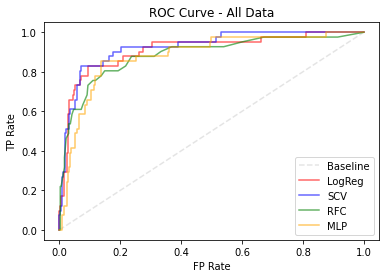

In [14]:
print("all data")
ns_auc = roc_auc_score(y_test_og, ns_probs)
lr_auc_lgrg = roc_auc_score(y_test_og, lr_probs_lgrg)
lr_auc_scv = roc_auc_score(y_test_og, lr_probs_scv)
lr_auc_rfc = roc_auc_score(y_test_og, lr_probs_rfc)
lr_auc_mlp = roc_auc_score(y_test_og, lr_probs_mlp)
print('Baseline: ROC AUC= %.4f' % (ns_auc))
print('Logistic: ROC AUC= %.4f' % (lr_auc_lgrg))
print('SCV     : ROC AUC= %.4f' % (lr_auc_scv))
print('RFC     : ROC AUC= %.4f' % (lr_auc_rfc))
print('MLP     : ROC AUC= %.4f' % (lr_auc_mlp))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_og, ns_probs)
lr_fpr_lgrg, lr_tpr_lgrg, _ = roc_curve(y_test_og, lr_probs_lgrg)
lr_fpr_scv, lr_tpr_scv, _ = roc_curve(y_test_og, lr_probs_scv)
lr_fpr_rfc, lr_tpr_rfc, _ = roc_curve(y_test_og, lr_probs_rfc)
lr_fpr_mlp, lr_tpr_mlp, _ = roc_curve(y_test_og, lr_probs_mlp)

# plot the roc curve for the model
plt.title('ROC Curve - All Data')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color = "lightgrey", alpha = 0.6)
plt.plot(lr_fpr_lgrg, lr_tpr_lgrg, marker='', label='LogReg', color = "red", alpha = 0.6)
plt.plot(lr_fpr_scv, lr_tpr_scv, marker='', label='SCV', color = "blue", alpha = 0.6)
plt.plot(lr_fpr_rfc, lr_tpr_rfc, marker='', label='RFC', color = "green", alpha = 0.6)
plt.plot(lr_fpr_mlp, lr_tpr_mlp, marker='', label='MLP', color = "orange", alpha = 0.6)
# axis labels
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

average percision - PCA Features
Log Reg  : 0.4173
SCV      : 0.4326
RFC      : 0.3933
MLP      : 0.5451


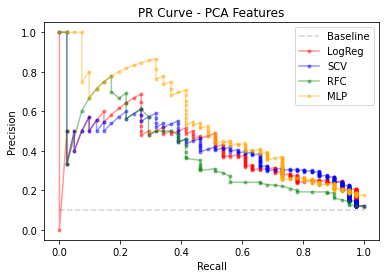

In [15]:
average_precision_pca_lgrg = average_precision_score(y_test_ft, lr_probs_lgrg_ft)
average_precision_pca_scv = average_precision_score(y_test_ft, lr_probs_scv_ft)
average_precision_pca_rfc = average_precision_score(y_test_ft, lr_probs_rfc_ft)
average_precision_pca_mlp = average_precision_score(y_test_ft, lr_probs_mlp_ft)

no_skill = y_test_ft.sum(axis =0) / len(y_test_ft)

precision_pca_lgrg, recall_pca_lgrg, thresholds_pca_lgrg = precision_recall_curve(y_test_ft, lr_probs_lgrg_ft)
precision_pca_scv, recall_pca_scv, thresholds_pca_scv = precision_recall_curve(y_test_ft, lr_probs_scv_ft)
precision_pca_rfc, recall_pca_rfc, thresholds_pca_rfc = precision_recall_curve(y_test_ft, lr_probs_rfc_ft)
precision_pca_mlp, recall_pca_mlp, thresholds_pca_mlp = precision_recall_curve(y_test_ft, lr_probs_mlp_ft)

print("average percision - PCA Features")
print("Log Reg  : %.4f" % (average_precision_pca_lgrg))
print("SCV      : %.4f" % (average_precision_pca_scv))
print("RFC      : %.4f" % (average_precision_pca_rfc))
print("MLP      : %.4f" % (average_precision_pca_mlp))

plt.title('PR Curve - PCA Features')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline', color = "lightgrey")
plt.plot(recall_pca_lgrg, precision_pca_lgrg, marker='.', label='LogReg',color = "red", alpha = 0.4)
plt.plot(recall_pca_scv, precision_pca_scv, marker='.', label='SCV',color = "blue", alpha = 0.4)
plt.plot(recall_pca_rfc, precision_pca_rfc, marker='.', label='RFC',color = "green", alpha = 0.4)
plt.plot(recall_pca_mlp, precision_pca_mlp, marker='.', label='MLP',color = "orange", alpha = 0.4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

features pca
Baseline: ROC AUC= 0.5000
Logistic: ROC AUC= 0.8608
SCV     : ROC AUC= 0.8667
RFC     : ROC AUC= 0.8013
MLP     : ROC AUC= 0.8772


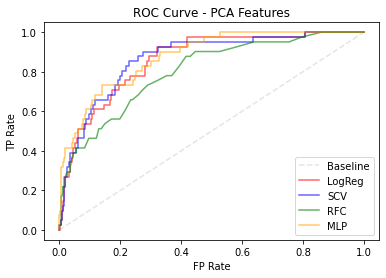

In [16]:
print("features pca")
ns_auc = roc_auc_score(y_test_ft, ns_probs)
lr_auc_lgrg_ft = roc_auc_score(y_test_ft, lr_probs_lgrg_ft)
lr_auc_scv_ft = roc_auc_score(y_test_ft, lr_probs_scv_ft)
lr_auc_rfc_ft = roc_auc_score(y_test_ft, lr_probs_rfc_ft)
lr_auc_mlp_ft = roc_auc_score(y_test_ft, lr_probs_mlp_ft)
print('Baseline: ROC AUC= %.4f' % (ns_auc))
print('Logistic: ROC AUC= %.4f' % (lr_auc_lgrg_ft))
print('SCV     : ROC AUC= %.4f' % (lr_auc_scv_ft))
print('RFC     : ROC AUC= %.4f' % (lr_auc_rfc_ft))
print('MLP     : ROC AUC= %.4f' % (lr_auc_mlp_ft))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_ft, ns_probs)
lr_fpr_lgrg_ft, lr_tpr_lgrg_ft, _ = roc_curve(y_test_ft, lr_probs_lgrg_ft)
lr_fpr_scv_ft, lr_tpr_scv_ft, _ = roc_curve(y_test_ft, lr_probs_scv_ft)
lr_fpr_rfc_ft, lr_tpr_rfc_ft, _ = roc_curve(y_test_ft, lr_probs_rfc_ft)
lr_fpr_mlp_ft, lr_tpr_mlp_ft, _ = roc_curve(y_test_ft, lr_probs_mlp_ft)

# plot the roc curve for the model
plt.title('ROC Curve - PCA Features')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color = "lightgrey", alpha = 0.6)
plt.plot(lr_fpr_lgrg_ft, lr_tpr_lgrg_ft, marker='', label='LogReg', color = "red", alpha = 0.6)
plt.plot(lr_fpr_scv_ft, lr_tpr_scv_ft, marker='', label='SCV', color = "blue", alpha = 0.6)
plt.plot(lr_fpr_rfc_ft, lr_tpr_rfc_ft, marker='', label='RFC', color = "green", alpha = 0.6)
plt.plot(lr_fpr_mlp_ft, lr_tpr_mlp_ft, marker='', label='MLP', color = "orange", alpha = 0.6)
# axis labels
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

average percision - tSNE Features
Log Reg  : 0.3294
SCV      : 0.2249
RFC      : 0.4303
MLP      : 0.3681


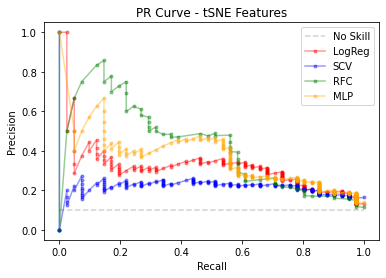

In [17]:
average_precision_tsne_lgrg = average_precision_score(y_test_ts, lr_probs_lgrg_ts)
average_precision_tsne_scv = average_precision_score(y_test_ts, lr_probs_scv_ts)
average_precision_tsne_rfc = average_precision_score(y_test_ts, lr_probs_rfc_ts)
average_precision_tsne_mlp = average_precision_score(y_test_ts, lr_probs_mlp_ts)

no_skill = y_test_ts.sum(axis =0) / len(y_test_ts)

precision_tsne_lgrg, recall_tsne_lgrg, thresholds_tsne_lgrg = precision_recall_curve(y_test_ts, lr_probs_lgrg_ts)
precision_tsne_scv, recall_tsne_scv, thresholds_tsne_scv = precision_recall_curve(y_test_ts, lr_probs_scv_ts)
precision_tsne_rfc, recall_tsne_rfc, thresholds_tsne_rfc = precision_recall_curve(y_test_ts, lr_probs_rfc_ts)
precision_tsne_mlp, recall_tsne_mlp, thresholds_tsne_mlp = precision_recall_curve(y_test_ts, lr_probs_mlp_ts)

print("average percision - tSNE Features")
print("Log Reg  : %.4f" % (average_precision_tsne_lgrg))
print("SCV      : %.4f" % (average_precision_tsne_scv))
print("RFC      : %.4f" % (average_precision_tsne_rfc))
print("MLP      : %.4f" % (average_precision_tsne_mlp))

plt.title('PR Curve - tSNE Features')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color = "lightgrey")
plt.plot(recall_tsne_lgrg, precision_tsne_lgrg, marker='.', label='LogReg',color = "red", alpha = 0.4)
plt.plot(recall_tsne_scv, precision_tsne_scv, marker='.', label='SCV',color = "blue", alpha = 0.4)
plt.plot(recall_tsne_rfc, precision_tsne_rfc, marker='.', label='RFC',color = "green", alpha = 0.4)
plt.plot(recall_tsne_mlp, precision_tsne_mlp, marker='.', label='MLP',color = "orange", alpha = 0.4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

features tsne
Baseline: ROC AUC= 0.5000
Logistic: ROC AUC= 0.8259
SCV     : ROC AUC= 0.7842
RFC     : ROC AUC= 0.8168
MLP     : ROC AUC= 0.8404


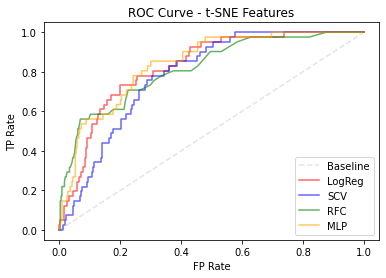

In [18]:
print("features tsne")
ns_auc = roc_auc_score(y_test_ts, ns_probs)
lr_auc_lgrg_ts = roc_auc_score(y_test_ts, lr_probs_lgrg_ts)
lr_auc_scv_ts = roc_auc_score(y_test_ts, lr_probs_scv_ts)
lr_auc_rfc_ts = roc_auc_score(y_test_ts, lr_probs_rfc_ts)
lr_auc_mlp_ts = roc_auc_score(y_test_ts, lr_probs_mlp_ts)
print('Baseline: ROC AUC= %.4f' % (ns_auc))
print('Logistic: ROC AUC= %.4f' % (lr_auc_lgrg_ts))
print('SCV     : ROC AUC= %.4f' % (lr_auc_scv_ts))
print('RFC     : ROC AUC= %.4f' % (lr_auc_rfc_ts))
print('MLP     : ROC AUC= %.4f' % (lr_auc_mlp_ts))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_ts, ns_probs)
lr_fpr_lgrg_ts, lr_tpr_lgrg_ts, _ = roc_curve(y_test_ts, lr_probs_lgrg_ts)
lr_fpr_scv_ts, lr_tpr_scv_ts, _ = roc_curve(y_test_ts, lr_probs_scv_ts)
lr_fpr_rfc_ts, lr_tpr_rfc_ts, _ = roc_curve(y_test_ts, lr_probs_rfc_ts)
lr_fpr_mlp_ts, lr_tpr_mlp_ts, _ = roc_curve(y_test_ts, lr_probs_mlp_ts)

# plot the roc curve for the model
plt.title('ROC Curve - t-SNE Features')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color = "lightgrey", alpha = 0.6)
plt.plot(lr_fpr_lgrg_ts, lr_tpr_lgrg_ts, marker='', label='LogReg', color = "red", alpha = 0.6)
plt.plot(lr_fpr_scv_ts, lr_tpr_scv_ts, marker='', label='SCV', color = "blue", alpha = 0.6)
plt.plot(lr_fpr_rfc_ts, lr_tpr_rfc_ts, marker='', label='RFC', color = "green", alpha = 0.6)
plt.plot(lr_fpr_mlp_ts, lr_tpr_mlp_ts, marker='', label='MLP', color = "orange", alpha = 0.6)
# axis labels
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

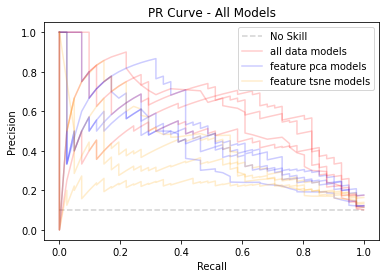

In [19]:
plt.title('PR Curve - All Models')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color = "lightgrey")
plt.plot(recall_all_lgrg, precision_all_lgrg, marker='', label='all data models',color = "red", alpha = 0.2)
plt.plot(recall_all_scv, precision_all_scv, marker='',color = "red", alpha = 0.2)
plt.plot(recall_all_rfc, precision_all_rfc, marker='',color = "red", alpha = 0.2)
plt.plot(recall_all_mlp, precision_all_mlp, marker='',color = "red", alpha = 0.2)
plt.plot(recall_pca_lgrg, precision_pca_lgrg, marker='', label='feature pca models',color = "blue", alpha = 0.2)
plt.plot(recall_pca_scv, precision_pca_scv, marker='',color = "blue", alpha = 0.2)
plt.plot(recall_pca_rfc, precision_pca_rfc, marker='',color = "blue", alpha = 0.2)
plt.plot(recall_pca_mlp, precision_pca_mlp, marker='',color = "blue", alpha = 0.2)
plt.plot(recall_tsne_lgrg, precision_tsne_lgrg, marker='', label='feature tsne models',color = "orange", alpha = 0.2)
plt.plot(recall_tsne_scv, precision_tsne_scv, marker='',color = "orange", alpha = 0.2)
plt.plot(recall_tsne_rfc, precision_tsne_rfc, marker='',color = "orange", alpha = 0.2)
plt.plot(recall_tsne_mlp, precision_tsne_mlp, marker='',color = "orange", alpha = 0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

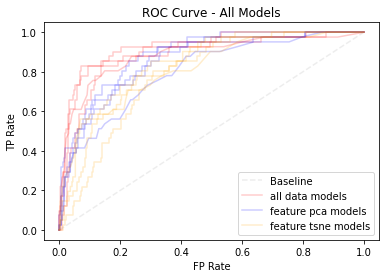

In [20]:
plt.title('ROC Curve - All Models')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color = "lightgrey", alpha = 0.4)
plt.plot(lr_fpr_lgrg, lr_tpr_lgrg, marker='', label='all data models', color = "red", alpha = 0.2)
plt.plot(lr_fpr_scv, lr_tpr_scv, marker='', color = "red", alpha = 0.2)
plt.plot(lr_fpr_rfc, lr_tpr_rfc, marker='', color = "red", alpha = 0.2)
plt.plot(lr_fpr_mlp, lr_tpr_mlp, marker='', color = "red", alpha = 0.2)
plt.plot(lr_fpr_lgrg_ft, lr_tpr_lgrg_ft, marker='', label='feature pca models', color = "blue", alpha = 0.2)
plt.plot(lr_fpr_scv_ft, lr_tpr_scv_ft, marker='', color = "blue", alpha = 0.2)
plt.plot(lr_fpr_rfc_ft, lr_tpr_rfc_ft, marker='', color = "blue", alpha = 0.2)
plt.plot(lr_fpr_mlp_ft, lr_tpr_mlp_ft, marker='', color = "blue", alpha = 0.2)
plt.plot(lr_fpr_lgrg_ts, lr_tpr_lgrg_ts, marker='', label='feature tsne models', color = "orange", alpha = 0.2)
plt.plot(lr_fpr_scv_ts, lr_tpr_scv_ts, marker='', color = "orange", alpha = 0.2)
plt.plot(lr_fpr_rfc_ts, lr_tpr_rfc_ts, marker='', color = "orange", alpha = 0.2)
plt.plot(lr_fpr_mlp_ts, lr_tpr_mlp_ts, marker='', color = "orange", alpha = 0.2)
# axis labels
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

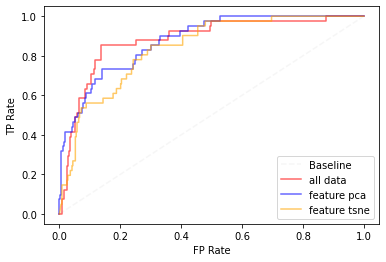

In [21]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color = "lightgrey", alpha = 0.2)
#plt.plot(lr_fpr_lgrg, lr_tpr_lgrg, marker='', label='all data', color = "red", alpha = 0.6)
#plt.plot(lr_fpr_scv, lr_tpr_scv, marker='', label='all data', color = "red", alpha = 0.6)
#plt.plot(lr_fpr_rfc, lr_tpr_rfc, marker='', label='all data', color = "red", alpha = 0.6)
plt.plot(lr_fpr_mlp, lr_tpr_mlp, marker='', label='all data', color = "red", alpha = 0.6)
#plt.plot(lr_fpr_lgrg_ft, lr_tpr_lgrg_ft, marker='', label='feature pca', color = "blue", alpha = 0.6)
#plt.plot(lr_fpr_scv_ft, lr_tpr_scv_ft, marker='', label='feature pca', color = "blue", alpha = 0.6)
#plt.plot(lr_fpr_rfc_ft, lr_tpr_rfc_ft, marker='', label='feature pca', color = "blue", alpha = 0.6)
plt.plot(lr_fpr_mlp_ft, lr_tpr_mlp_ft, marker='', label='feature pca', color = "blue", alpha = 0.6)
#plt.plot(lr_fpr_lgrg_ts, lr_tpr_lgrg_ts, marker='', label='feature tsne', color = "orange", alpha = 0.6)
#plt.plot(lr_fpr_scv_ts, lr_tpr_scv_ts, marker='', label='feature tsne', color = "orange", alpha = 0.6)
#plt.plot(lr_fpr_rfc_ts, lr_tpr_rfc_ts, marker='', label='feature tsne', color = "orange", alpha = 0.6)
plt.plot(lr_fpr_mlp_ts, lr_tpr_mlp_ts, marker='', label='feature tsne', color = "orange", alpha = 0.6)
# axis labels
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Log Reg Feature Importance

In [22]:
importance_all = log_reg.coef_[0]

log_reg_all_fimp = pd.concat((pd.DataFrame(meas_no_age.columns).rename(columns={0:"feature"}),
                              pd.DataFrame(importance_all).rename(columns={0:"importance"})),axis=1)
log_reg_all_fimp["abs importance"] = np.abs(pd.to_numeric(log_reg_all_fimp["importance"]))
log_reg_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
707,b23_V26,-0.536615
373,b13_V2,0.432041
1502,b49_V15,-0.385897
1410,b46_V16,0.375955
1429,b47_V4,0.370341
417,b14_V15,0.367329
142,b5_V19,0.351055
851,b28_V15,-0.346788
47,b2_V17,-0.345891
333,b11_V24,-0.344668


In [23]:
importance_pca = log_reg_ft.coef_[0]

log_reg_pca_fimp = pd.concat((pd.DataFrame(meas_feat.columns).rename(columns={0:"feature"}), 
                              pd.DataFrame(importance_pca).rename(columns={0:"importance"})),axis=1)
log_reg_pca_fimp["abs importance"] = np.abs(pd.to_numeric(log_reg_pca_fimp["importance"]))
log_reg_pca_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
215,b_20_imagfeat,1.174129
200,b_5_imagfeat,-1.105510
104,b_7_volumn,-1.078463
237,b_42_imagfeat,1.045381
178,b_32_surfarea,1.027678
233,b_38_imagfeat,-0.948275
100,b_3_volumn,-0.886878
238,b_43_imagfeat,-0.871626
30,b_31_describe,0.859907
207,b_12_imagfeat,0.851594


In [24]:
importance_tsne = log_reg_ts.coef_[0]

log_reg_tsne_fimp = pd.concat((pd.DataFrame(meas_tsne.columns).rename(columns={0:"feature"}), 
                               pd.DataFrame(importance_tsne).rename(columns={0:"importance"})),axis=1)
log_reg_tsne_fimp["abs importance"] = np.abs(pd.to_numeric(log_reg_tsne_fimp["importance"]))
log_reg_tsne_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
208,b_13_imagfeat,-0.016791
225,b_30_imagfeat,-0.015097
178,b_32_surfarea,0.014664
218,b_23_imagfeat,-0.013413
152,b_6_surfarea,-0.012398
195,b_49_surfarea,0.011912
216,b_21_imagfeat,0.011137
32,b_33_describe,-0.011037
242,b_47_imagfeat,-0.011035
217,b_22_imagfeat,0.010841


## SVC Feature Importance

In [25]:
importance_all_scv = mod_scv.coef_[0]

scv_all_fimp = pd.concat((pd.DataFrame(meas_no_age.columns).rename(columns={0:"feature"}),
                              pd.DataFrame(importance_all_scv).rename(columns={0:"importance"})),axis=1)
scv_all_fimp["abs importance"] = np.abs(pd.to_numeric(scv_all_fimp["importance"]))
scv_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)


,feature,importance
707,b23_V26,-0.132404
1502,b49_V15,-0.131145
373,b13_V2,0.122412
1429,b47_V4,0.121115
282,b10_V4,0.118371
417,b14_V15,0.107367
945,b31_V16,-0.106455
851,b28_V15,-0.104525
853,b28_V17,0.102847
198,b7_V13,0.099112


In [26]:
importance_pca_scv = mod_scv_ft.coef_[0]

scv_pca_fimp = pd.concat((pd.DataFrame(meas_feat.columns).rename(columns={0:"feature"}),
                              pd.DataFrame(importance_pca_scv).rename(columns={0:"importance"})),axis=1)
scv_pca_fimp["abs importance"] = np.abs(pd.to_numeric(scv_pca_fimp["importance"]))
scv_pca_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
178,b_32_surfarea,1.112599
100,b_3_volumn,-0.915069
215,b_20_imagfeat,0.895240
208,b_13_imagfeat,-0.888072
232,b_37_imagfeat,0.856969
30,b_31_describe,0.817094
200,b_5_imagfeat,-0.758151
233,b_38_imagfeat,-0.731513
126,b_29_volumn,-0.689698
128,b_31_volumn,-0.680453


In [27]:
importance_tsne_scv = mod_scv_ts.coef_[0]

scv_tsne_fimp = pd.concat((pd.DataFrame(meas_tsne.columns).rename(columns={0:"feature"}),
                              pd.DataFrame(importance_tsne_scv).rename(columns={0:"importance"})),axis=1)
scv_tsne_fimp["abs importance"] = np.abs(pd.to_numeric(scv_tsne_fimp["importance"]))
scv_tsne_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
195,b_49_surfarea,0.101835
178,b_32_surfarea,0.100030
208,b_13_imagfeat,-0.094490
152,b_6_surfarea,-0.090219
242,b_47_imagfeat,-0.089486
222,b_27_imagfeat,-0.088845
236,b_41_imagfeat,0.084030
217,b_22_imagfeat,0.083506
5,b_6_describe,0.081455
48,b_49_describe,-0.073185


## Random Forest Feature Importance

In [28]:
importance_all_rfc = mod_rfc.feature_importances_

rfc_all_fimp = pd.concat((pd.DataFrame(meas_no_age.columns).rename(columns={0:"feature"}), 
                          pd.DataFrame(importance_all_rfc).rename(columns={0:"importance"})),axis=1)
rfc_all_fimp.sort_values(by=["importance"], ascending=False).head(10)

,feature,importance
1512,b49_V25,0.013887
1410,b46_V16,0.012409
953,b31_V24,0.011408
933,b31_V4,0.008316
1379,b45_V16,0.008118
376,b13_V5,0.008011
382,b13_V11,0.006856
1184,b39_V7,0.006517
405,b14_V3,0.006292
947,b31_V18,0.005763


In [29]:
importance_pca_rfc = mod_rfc_ft.feature_importances_

rfc_pca_fimp = pd.concat((pd.DataFrame(meas_feat.columns).rename(columns={0:"feature"}), 
                          pd.DataFrame(importance_pca_rfc).rename(columns={0:"importance"})),axis=1)
rfc_pca_fimp.sort_values(by=["importance"], ascending=False).head(10)

,feature,importance
61,b_13_length,0.023716
97,b_49_length,0.019628
18,b_19_describe,0.017798
136,b_39_volumn,0.015933
45,b_46_describe,0.014896
24,b_25_describe,0.014134
30,b_31_describe,0.011898
93,b_45_length,0.011531
60,b_12_length,0.011106
96,b_48_length,0.010159


In [30]:
importance_tsne_rfc = mod_rfc_ts.feature_importances_

rfc_tsne_fimp = pd.concat((pd.DataFrame(meas_tsne.columns).rename(columns={0:"feature"}), 
                          pd.DataFrame(importance_tsne_rfc).rename(columns={0:"importance"})),axis=1)
rfc_tsne_fimp.sort_values(by=["importance"], ascending=False).head(10)

,feature,importance
85,b_37_length,0.017076
93,b_45_length,0.017011
97,b_49_length,0.016263
82,b_34_length,0.016068
46,b_47_describe,0.012762
177,b_31_surfarea,0.012048
60,b_12_length,0.011900
61,b_13_length,0.011518
130,b_33_volumn,0.011475
38,b_39_describe,0.011278


In [31]:
# x_train_og, x_test_og, y_train_og, y_test_og
# https://romainlhardy.medium.com/estimating-feature-importance-the-easy-way-2ebe970c600c

In [130]:
def get_feature_importance(j, n, y_test, x_test, test_pred, model):
    s = f1_score(y_test, test_pred) # baseline score
    total = 0.0
    for i in range(n):
        perm = np.random.permutation(range(x_test.to_numpy().shape[0]))
        X_test_ = x_test.to_numpy().copy()
        X_test_[:, j] = x_test.to_numpy()[perm, j]
        y_pred_ = model.predict(X_test_)
        s_ij = f1_score(y_test, y_pred_)
        total += s_ij
    return s - total / n

In [116]:
# Feature importances
n = 150
f_all = []

for j in tqdm(range(x_test_og.shape[1])):
    f_j = get_feature_importance(j, n, y_test_og, x_test_og, pred_test_mlp, mod_mlp)
    f_all.append(f_j)

100%|██████████| 1519/1519 [31:06<00:00,  1.23s/it]


In [112]:
n = 900
f_pca = []
f_tsne = []

for j in tqdm(range(x_test_ft.shape[1])):
    f_j = get_feature_importance(j, n, y_test_ft, x_test_ft, pred_test_mlp_ft, mod_mlp_ft)
    f_pca.append(f_j)

for j in tqdm(range(x_test_ts.shape[1])):
    f_j = get_feature_importance(j, n, y_test_ts, x_test_ts, pred_test_mlp_ts, mod_mlp_ts)
    f_tsne.append(f_j)

100%|██████████| 245/245 [10:33<00:00,  2.59s/it]


In [120]:
mlp_all_fimp = pd.DataFrame({'feature': list(x_test_og.columns),'importance': f_all})
mlp_all_fimp["abs importance"] = np.abs(pd.to_numeric(mlp_all_fimp["importance"]))
mlp_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
827,b27_V22,0.027347
831,b27_V26,0.026917
853,b28_V17,0.026466
707,b23_V26,0.026405
287,b10_V9,0.025572
285,b10_V7,0.025171
7,b1_V8,0.024087
672,b22_V22,0.024034
1410,b46_V16,0.023762
359,b12_V19,0.023106


In [121]:
mlp_pca_fimp = pd.DataFrame({'feature': list(x_test_ft.columns),'importance': f_pca})
mlp_pca_fimp["abs importance"] = np.abs(pd.to_numeric(mlp_pca_fimp["importance"]))
mlp_pca_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
157,b_11_surfarea,-0.045145
213,b_18_imagfeat,-0.040750
71,b_23_length,-0.037962
148,b_2_surfarea,-0.037578
217,b_22_imagfeat,-0.036916
73,b_25_length,-0.036638
226,b_31_imagfeat,-0.035592
49,b_1_length,-0.034561
81,b_33_length,-0.033655
200,b_5_imagfeat,-0.033611


In [122]:
mlp_tsne_fimp = pd.DataFrame({'feature': list(x_test_ts.columns),'importance': f_tsne})
mlp_tsne_fimp["abs importance"] = np.abs(pd.to_numeric(mlp_tsne_fimp["importance"]))
mlp_tsne_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
95,b_47_length,0.067878
128,b_31_volumn,0.061709
138,b_41_volumn,0.057837
108,b_11_volumn,0.057399
162,b_16_surfarea,0.056483
238,b_43_imagfeat,0.054700
184,b_38_surfarea,0.053609
169,b_23_surfarea,0.051593
235,b_40_imagfeat,0.050586
231,b_36_imagfeat,0.048859


In [142]:
# Feature importances
n = 2000
f_pca_lgrg = []

for j in tqdm(range(x_test_ft.shape[1])):
    f_j = get_feature_importance(j, n, y_test_ft, x_test_ft, pred_test_lgrg_ft, log_reg_ft)
    f_pca_lgrg.append(f_j)

100%|██████████| 245/245 [19:08<00:00,  4.69s/it]


In [145]:
importance_pca = log_reg_ft.coef_[0]

log_reg_pca_fimp = pd.concat((pd.DataFrame(meas_feat.columns).rename(columns={0:"feature"}), 
                              pd.DataFrame(importance_pca).rename(columns={0:"importance"})),axis=1)
log_reg_pca_fimp["abs importance"] = np.abs(pd.to_numeric(log_reg_pca_fimp["importance"]))
log_reg_pca_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(20)

,feature,importance
215,b_20_imagfeat,1.174129
200,b_5_imagfeat,-1.105510
104,b_7_volumn,-1.078463
237,b_42_imagfeat,1.045381
178,b_32_surfarea,1.027678
233,b_38_imagfeat,-0.948275
100,b_3_volumn,-0.886878
238,b_43_imagfeat,-0.871626
30,b_31_describe,0.859907
207,b_12_imagfeat,0.851594


In [147]:
lgrg_pca_fimp = pd.DataFrame({'feature': list(x_test_ft.columns),'importance': f_pca_lgrg})
lgrg_pca_fimp["abs importance"] = np.abs(pd.to_numeric(lgrg_pca_fimp["importance"]))
lgrg_pca_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(20)

,feature,importance
238,b_43_imagfeat,0.140731
200,b_5_imagfeat,0.136457
233,b_38_imagfeat,0.119397
215,b_20_imagfeat,0.104425
208,b_13_imagfeat,0.103604
195,b_49_surfarea,0.084722
230,b_35_imagfeat,0.083307
242,b_47_imagfeat,0.080599
207,b_12_imagfeat,0.078375
228,b_33_imagfeat,0.077414
